In [1]:
# -*- coding: utf-8 -*-
import os 
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pickle
import cv2
from IPython import display
import random

#from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline

In [2]:
with open("./FaceImage.data" , 'rb') as f:
    faceImages = pickle.load(f)
with open("./FaceLabel.data" , 'rb') as f:
    faceLabels = pickle.load(f)
with open("./FaceAnswer.data" , 'rb') as f:
    faceAnswers = pickle.load(f)

In [3]:
#faceImages 와 faceAnswers , faceLabels 는numpy array(행렬) 입니다.
#numpy array 의 .shape 는 해당 행렬이 몇 X 몇 의 행렬인지 보여 줍니다.
print(faceImages.shape)
print(faceImages[0].shape)

(2, 4096)
(4096,)


In [4]:
#(2, 4096) 이란 뜻은 (2 , 4096 , 1) 의 의미이며, 1X4096 의 데이터가 2개 있음을 의미 합니다.
#faceImages 는 두개의 이미지( 웃는 얼굴, 우는 얼굴)이 들어 있습니다.(그래서 2개)
#2개의 이미지 각각은 행렬화 한 64X64 의 이미지를 다시 Flatten 하여 1X4096 으로 만들어서 저장했습니다.(64*64 = 4096)

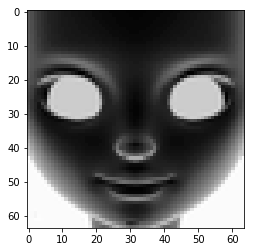

In [5]:
smile = faceImages[0].reshape((64,64)) #스마일 이미지(4096)을 다시 64*64 의 2차원 이미지 행렬로 바꿔 줍니다.(reshape)
plt.imshow(smile, cmap='Greys') #화면에 그려 줍니다.

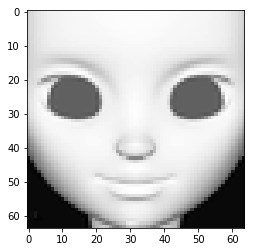

In [6]:
#이미지의 색깔이 반전 되어 보이므로 보기 편하게 다시 반전 해 준 뒤 화면에 보여 줍니다.
smile = smile*-1 
plt.imshow(smile, cmap='Greys') #다시 그려줍니다

In [7]:
#스마일 이미지는 faceImages[0] 이었으므로 이 이미지의 좌표는 faceLabels[0] 입니다.
#lable은 총 4쌍(8개)의 float 데이터로 이루어 져 있으며, 
#첫번째 쌍은 좌측 눈썹, 두번째 쌍은 우측 눈썹, 새번째 쌍은 왼쪽 입꼬리 , 네번쨰 쌍은 오른쪽 입꼬리의 x,y 좌표를 의미 합니다.
#예를 들어 0.60264637 는 이미지 총 너비의 0.60264637 배 되는 위치에 점 X 좌표가 존재 한다는 뜻 입니다.
print(faceLabels[0].shape)
print(faceLabels[0])

(8,)
[ 0.60264637  0.24577485  0.39150267  0.23441131  0.69405254  0.7648172
  0.29532641  0.76063934]


(29750,)


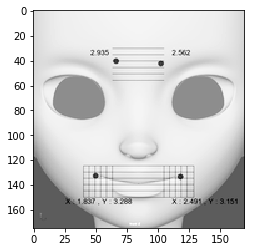

In [8]:
#Answer 는 각 이미지에 좌표가 찍혀 있는 그림입니다.
#나중에 컴퓨터가 추정한 위치가 실제 위치와 동일한지 검증하기 위해 사용합니다.
#Anser 는 175 X 170 의 이미지를 Flartten 하여 1 X 29750 의 이미지로 저장하였습니다.
print(faceAnswers[0].shape)
smileAnswer = faceAnswers[0].reshape((175,170)) #화난 이미지(4096)을 다시 64*64 의 2차원 이미지 행렬로 바꿔 줍니다.(reshape)
smileAnswer = smileAnswer*-1 #이미지의 색깔을 반전 합니다.
plt.imshow(smileAnswer, cmap='Greys') #화면에 그려 줍니다.


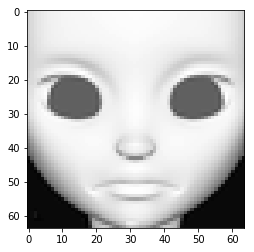

In [9]:
#화난 얼굴의 이미지를 화면에 표시 합니다.
angry = faceImages[1].reshape((64,64)) #화난 이미지(4096)을 다시 64*64 의 2차원 이미지 행렬로 바꿔 줍니다.(reshape)
angry = angry*-1 #이미지의 색깔을 반전 합니다.
plt.imshow(angry, cmap='Greys') #화면에 그려 줍니다.

In [10]:
#화난 얼굴의 좌표를 표시 합니다.
print(faceLabels[1].shape)
print(faceLabels[1])

(8,)
[ 0.60264637  0.17927217  0.39150267  0.22017689  0.70646246  0.84529224
  0.28633134  0.84706919]


(29750,)


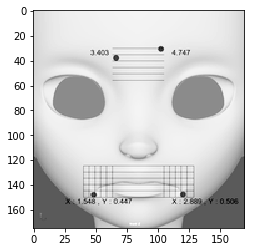

In [11]:
#Anser 는 175 X 170 의 이미지를 Flartten 하여 1 X 29750 의 이미지로 저장하였습니다.
print(faceAnswers[1].shape)
angryAnswer = faceAnswers[1].reshape((175,170)) #화난 이미지(4096)을 다시 64*64 의 2차원 이미지 행렬로 바꿔 줍니다.(reshape)
angryAnswer = angryAnswer*-1 #이미지의 색깔을 반전 합니다.
plt.imshow(angryAnswer, cmap='Greys') #화면에 그려 줍니다.

In [12]:
#모델을 생성 합니다.
#모델 이란, 데이터를 어떻게 곱하고, 더하고, 다시 나누고 할지에 대한 시나리오 입니다.
#행렬곱을 몇번 할 것인지, 다시 더할것인지, 등등에 대해서 정의 합니다.
#실제 계산은 지금 이루어 지지 않습니다. 오직 시나리오만 정해서 텐서프로우에 넘겨 줍니다.

#텐서플로우는 placeholder 라는 변수와 Variable 이라는 변수 두가지를 사용 합니다.
#placeholder 는 프로그램 시작시 입력해 주는 함수의 매게 변수이며 일반적으로 유저가 미리 값을 결정 합니다.
#Variable 은 프로그램 내부에서 프로그램에 의해 변경 되는 변수 이며 일반적으로 유저는 변경할수 없습니다.

y_ = tf.placeholder(tf.float32, [None, 8]) #y_ 은 Lable 값(정답 값)을 저장해 놓기 위해 사용합니다. 유저가 결정하므로 Placehodler 입니다.

x = tf.placeholder(tf.float32, [None, 4096]) # x 는 입력 데이터(이미지) 입니다. 유저가 집어 넣어 주므로 placeholder 입니다.

W1 = tf.Variable(tf.random_normal([4096, 1000] , stddev=0.001))# W 는 가중치 입니다. 초기화부터 오류의 역전파 까지 모두 컴퓨터가 수행합니다.

y1 = tf.matmul(x, W1)# 위의 두 변수를 행렬 곱 해줍니다. ( 1X4096 dot 4096X1000) -> 1X1000

y1 = tf.nn.relu(y1+0.000001)#relu 는 활성화 함수라고 하며 두 레이어 사이에 항상 들어 갑니다. 일단 설명 Pass.

W2 = tf.Variable(tf.random_normal([1000, 8] , stddev=0.001)) 

y2 = tf.matmul(y1, W2) #다시 위에서 나온 결과값인 y1 을 W2 와 곱해줍니다. (1 X 1000 dot 1000 X 8 ) ---> 1X8


# 복잡해 보이지만, x(입력값) 와 W1 을 행렬 곱 한 뒤에 그 결과값을 다시 W2 와 행렬곱 한 것이 전부 입니다.

In [13]:
#cost 란 진짜 정답과 컴퓨터의 예측이 얼마나 빗나갔는지 알려주는 지표 입니다.
# y_ 는 유저가 입력해준 진짜 정답이고 y2 는 컴퓨터가 예측 한 값 입니다.
# y_ > y2 일 경우에는 y_ - y2 는 양수 이지만 y2 > y_ 인 경우에는 y_ - y2 는 음수 이므로 거리를 표현하기 어렵습니다.
#그래서 y_ - y2 한 값을 재곱 해서 양수를 만들어 줍니다,
y_y2 = tf.square( y_ - y2)

In [14]:
#reduce_mean 은 평균값을 구해 주는 함수 입니다.
#mean 은 평균을 의미 하며, reduce 는 차원에 상관없이 모든 차원을 1차원으로 보고 값을 전부 더하겠다는 의미 입니다,
# 예를 들어 
# [[1 , 2 , 3] , [4,5,6] ] 의 reduce mean 은 (1 + 2 + 3 + 4 + 5 + 6 ) / 6 이 됩니다.
cost = tf.reduce_mean(y_y2)

In [15]:
#마지막으로 cost 값이 최소가 되도록 역전파 합니다.
#0.01 은 학습률 입니다. 작을수록 학습값이 정답에 가까워 지지만, 시간이 오래 걸린다는 단점이 있습니다.
#AdamOptimazer 라는 함수가 자동으로 cost 를 minimize 합니다.
#유저는 옵티마이져가 어떻게 코스트를 최소화 하는지에 대해서 신경 쓰지 않아도 상관 없습니다.
train_step = tf.train.AdamOptimizer(0.001).minimize(cost)

In [16]:
#이제 준비가 끝났습니다. 프로그램을 시작하기에 앞서 변수를 초기화 해 주어야 합니다.
init = tf.global_variables_initializer()
# 이 함수 역시 그냥 모양만 있습니다. 실제 함수의 초기화가 실행되지는 않았습니다.

In [17]:
#이제 정말 변수의 초기화를 실행 해 보겠습니다.
sess = tf.Session() #세션을 만들어 주고( 세션이란, 텐서플로우가 현재 실행되는 메모리 공간을 이야기 합니다.)
initResult = sess.run(init) # 세션에 init 을 집어 넣고 run 해 줍니다. 그러면 현재 위에 선언한 모든 variables 에 대해서 자동으로 초기화 해 줍니다.

In [18]:
#run 함수는 항상 대입한 변수 혹은 함수의 결과 값을 리턴 합니다.
#여러개의 결과 값을 동시에 보고 싶다면 run 에 튜플로 실행할 함수를 집어 넣어 주면 됩니다.
print(initResult) # 초기화 함수는 아무것도 리턴 하지 않았습니다.

None


In [19]:
#초기화가 끝났으므로, 이제 정말 학습을 시작합니다.
#위의 모델 설계를 보면 x*w1 = y1  ->  y1*w2 = y2  ->  cost(y2) -> optimize(cost) 이런 식입니다.
# train_step = tf.train.AdamOptimizer(0.001).minimize(cost) 이므로 train_step 이 우리가 최종적으로 실행 해야 할 함수가 됩니다.
# 즉 모델 단계의 제일 마지막, 결과를 보여 주는 함수를 실행해 주면 됩니다.
# 시작하기 전에 y2 의 값을 먼저 확인 해 봅니다.


#여기서 정말 중요한 것이 있습니다!
#위에서 placeholder 에 대해 잠깐 언급 했습니다.
# place holder 는 x 와 y_ 였습니다.
# 텐서플로우를 실행 하기 위해서는 반드시 플레이스홀더로 지정한 변수에 값을 대입 해 주어야만 합니다.
# x 는 입력 값이므로 faceImages 를 ,  y_ 는 정답 이므로 faceLabels 을 딕셔너리 로 지정해 줍니다.


result = sess.run(y2 , feed_dict={x: faceImages, y_: faceLabels})
print(result)

[[-0.00107479 -0.00039548  0.00234579 -0.000138   -0.00065048 -0.00026068
   0.00112449  0.00215429]
 [-0.00107571 -0.00041052  0.00234359 -0.00016405 -0.00062445 -0.00025149
   0.00110168  0.00215551]]


In [20]:
#위의 출력값은 초기화 된 변수들을 다 곱한 최종 값을 의미 합니다.
#즉 , x * w1 = y1 -> y1 * w2 = y2 의 y2 값이 위에서 초기화 한 값들에 의해 얼마가 되었는지 알려 줍니다.
#초기화 할때 단순히 변수에 값을 대입 하는 것 뿐만 아니라 실제 변수들끼리의 계산까지 미리 되어 있음을 알수 있습니다.

In [21]:
#이번엔 최적화를 실행 해 보겠습니다.
result = sess.run(train_step  , feed_dict={x: faceImages, y_: faceLabels})
print(result)

None


In [22]:
#출력값이 없습니다. 그래서, 출력값을 확인할 방법이 없습니다.
#출력값을 보기 위해 다음과 같이 실행 합니다.
result = sess.run( (train_step , y2)  , feed_dict={x: faceImages, y_: faceLabels})
print(result)

(None, array([[ 0.91360807,  0.80624801,  0.92964894,  0.80699575,  0.96076798,
         1.03288674,  0.91756088,  1.03857541],
       [ 0.91331184,  0.80596894,  0.92934674,  0.80673075,  0.96046561,
         1.03257501,  0.91725165,  1.03823316]], dtype=float32))


In [23]:
#두가지 결과 값이 나왔습니다. 하나는 train_step 의 결과인 None 이고 나머지 하나는 y2 의 값 입니다.
# 즉 train_step을 한번 실행해서 최적화 한 뒤에 그 결과값을 출력해 주었습니다.
#여기서 주목 할 것은 처음 초기화 하자마자 보여졌던 추력값과 지금의 출력값의 차이 입니다.
# 단 한번 실행했음에도 상당히 정답과 비슷하다는 것을 알수 있습니다.
#한번 정답을 다시 보겠습니다.
print(faceLabels)

[[ 0.60264637  0.24577485  0.39150267  0.23441131  0.69405254  0.7648172
   0.29532641  0.76063934]
 [ 0.60264637  0.17927217  0.39150267  0.22017689  0.70646246  0.84529224
   0.28633134  0.84706919]]


In [24]:
#이제 할 일은 추정 값이 정답과 최대한 가까워 질때 까지 무한히 트레이닝을 돌리는 것 입니다.
#추정값과 정답이 얼마나 거리가 있는지 보기 위해 cost 도 출력해 줍니다.
#50 회 실행시 cost 값을 1번씩 수행해서 실제 cost 가 잘 줄어 드는지 확인 합니다.
#cost 는 정답과 추정깂과의 거리 이므로 거리가 가까울수록, 즉 값이 작을수록 정답에 가까움을 의미 합니다.
for i in range(500):
    result = sess.run( (train_step , y2 , cost)  , feed_dict={x: faceImages, y_: faceLabels})
    if i%50 == 0:
        print("epoch is : " , i , ",  cost is : " , result[2])
    
    

epoch is :  0 ,  cost is :  0.124284
epoch is :  50 ,  cost is :  0.000746758
epoch is :  100 ,  cost is :  0.000567564
epoch is :  150 ,  cost is :  0.000547273
epoch is :  200 ,  cost is :  0.000526108
epoch is :  250 ,  cost is :  0.000503887
epoch is :  300 ,  cost is :  0.000856059
epoch is :  350 ,  cost is :  0.000512204
epoch is :  400 ,  cost is :  0.000495993
epoch is :  450 ,  cost is :  0.000480235


In [25]:
#1000 회의 최적화가 끝났습니다.
#이제 추정값과 정답간의 차이를 비교 해 보겠습니다.
#추정 값은 result[1] 입니다. 정답은 faceLabels 입니다.
#웃는 표정
print(u"정답      :        추정")
for i in range(8):
    print(faceLabels[0][i] , " : " , result[1][0][i] )

정답      :        추정
0.602646366693  :  0.598449
0.245774853475  :  0.211392
0.391502665565  :  0.388427
0.234411311888  :  0.225638
0.694052539747  :  0.69513
0.764817202034  :  0.798168
0.295326412183  :  0.288692
0.760639336991  :  0.796826


In [26]:
#화난 표정
print(u"정답      :        추정")
for i in range(8):
    print(faceLabels[1][i] , " : " , result[1][1][i] )

정답      :        추정
0.602646366693  :  0.606001
0.179272174395  :  0.212955
0.391502665565  :  0.39435
0.220176887227  :  0.228721
0.706462456875  :  0.705093
0.845292239767  :  0.812423
0.286331340255  :  0.292793
0.847069194836  :  0.811436


In [27]:
#상당히 정답에 근접 해 있음을 알수 있습니다.
#이번엔 좌표를 이미지 위에 직접 그려서 추정값과 정답간의 차이를 비교해 봅니다.
#최적화 되어 과는 과정을 처음부터 보기 위해 변수를 다시 초기화 해 줍니다.
sess = tf.Session() 
initResult = sess.run(init) 

epoch is :  0 ,  cost is :  0.311093
len(result[1][r]) 8


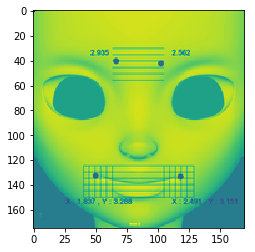

len(result[1][r]) 8


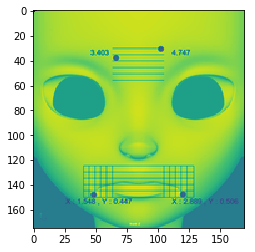

epoch is :  5 ,  cost is :  0.0476164
len(result[1][r]) 8


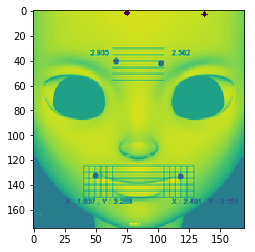

len(result[1][r]) 8


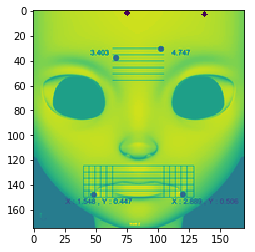

epoch is :  10 ,  cost is :  0.0205628
len(result[1][r]) 8


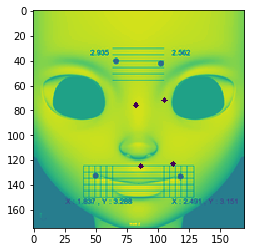

len(result[1][r]) 8


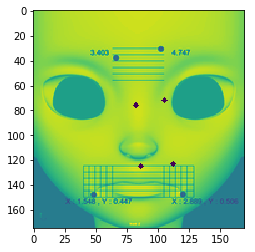

epoch is :  15 ,  cost is :  0.00808973
len(result[1][r]) 8


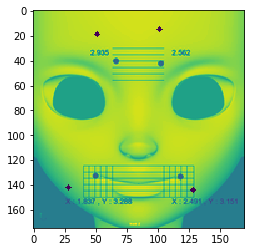

len(result[1][r]) 8


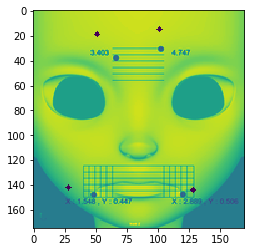

epoch is :  20 ,  cost is :  0.00224611
len(result[1][r]) 8


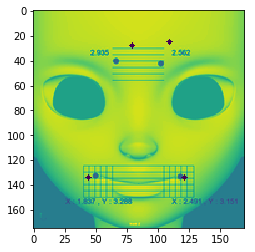

len(result[1][r]) 8


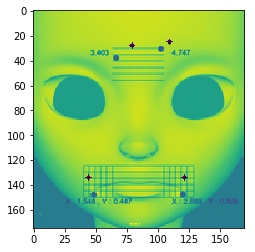

epoch is :  25 ,  cost is :  0.00272168
len(result[1][r]) 8


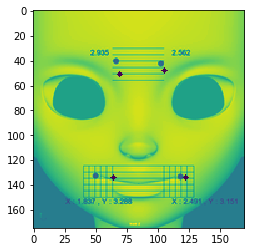

len(result[1][r]) 8


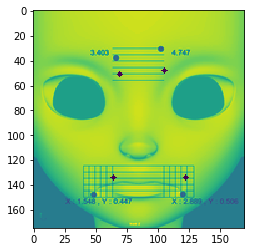

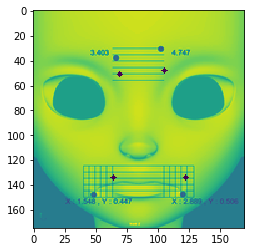

In [28]:
#초기에 자리가 잡아 가는 과정을 보기 위해 5회 반복마다 한번씩 데이터를 확인 해 봅니다.

for i in range(30):
    result = sess.run( (train_step , y2 , cost)  , feed_dict={x: faceImages, y_: faceLabels})
    if i%5 == 0:
        print("epoch is : " , i , ",  cost is : " , result[2])
        for r in range(len(result[1])):
            AnserImage = faceAnswers[r].copy().reshape((175,170))
            print("len(result[1][r])" , len(result[1][r]))
            for xy in range(len(result[1][r])):
                
                if xy%2 == 0:
                    yy = int(result[1][r][xy]*175.0) # Y 리스케일링
                else:
                    xx = int(result[1][r][xy]*170.0) # X 리스케일링
                    cv2.circle(AnserImage,(yy , xx), 2, (0,255,0), -1)#테스트 이미지에 좌표를 그려준다
            plt.imshow(AnserImage)#테스트 이미지 출력
            display.display(plt.gcf())#이미지를 실시간으로 표현한다

epoch is :  0 ,  cost is :  0.00132096
len(result[1][r]) 8


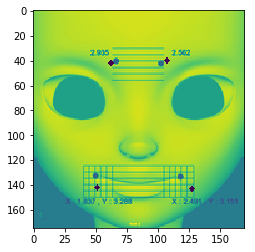

len(result[1][r]) 8


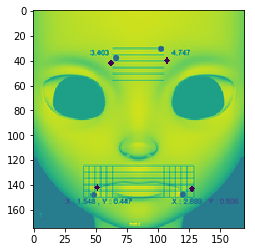

epoch is :  300 ,  cost is :  0.000472595
len(result[1][r]) 8


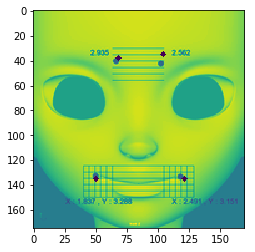

len(result[1][r]) 8


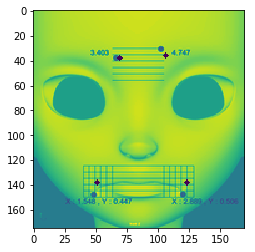

epoch is :  600 ,  cost is :  0.000357087
len(result[1][r]) 8


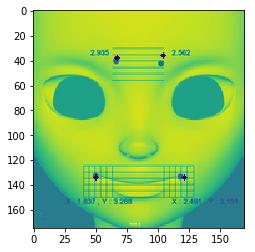

len(result[1][r]) 8


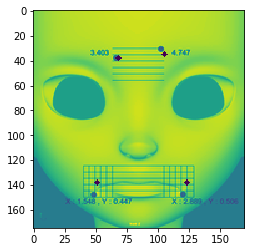

epoch is :  900 ,  cost is :  0.000179558
len(result[1][r]) 8


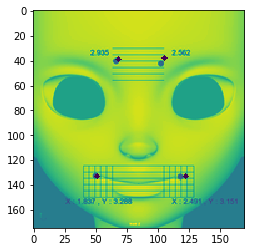

len(result[1][r]) 8


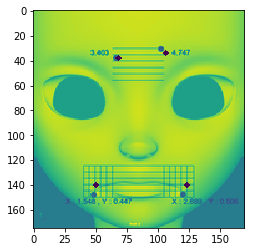

epoch is :  1200 ,  cost is :  0.000551766
len(result[1][r]) 8


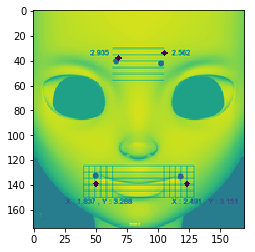

len(result[1][r]) 8


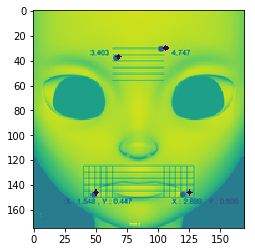

epoch is :  1500 ,  cost is :  0.000177067
len(result[1][r]) 8


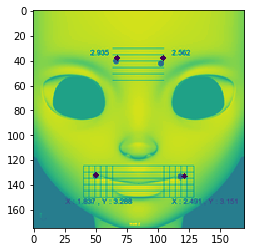

len(result[1][r]) 8


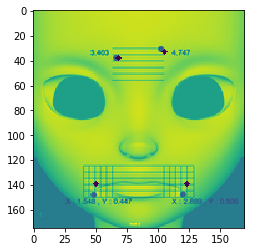

epoch is :  1800 ,  cost is :  0.00017836
len(result[1][r]) 8


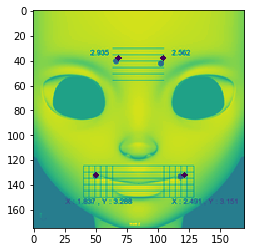

len(result[1][r]) 8


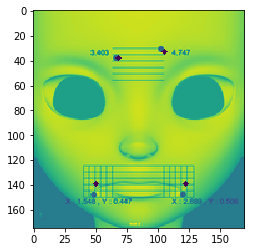

epoch is :  2100 ,  cost is :  9.05506e-05
len(result[1][r]) 8


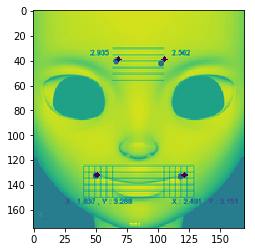

len(result[1][r]) 8


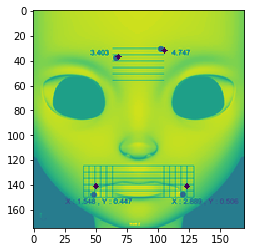

epoch is :  2400 ,  cost is :  2.82751e-05
len(result[1][r]) 8


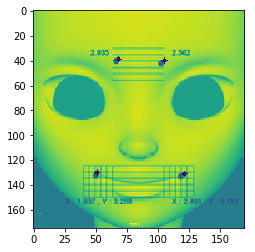

len(result[1][r]) 8


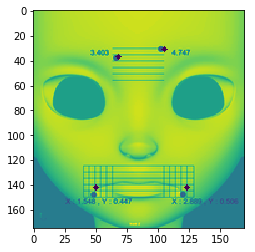

epoch is :  2700 ,  cost is :  2.58901e-05
len(result[1][r]) 8


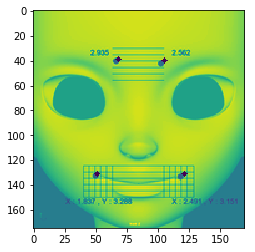

len(result[1][r]) 8


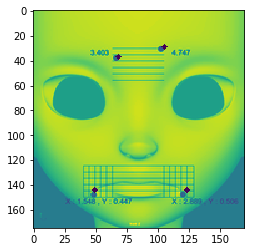

epoch is :  3000 ,  cost is :  5.75997e-07
len(result[1][r]) 8


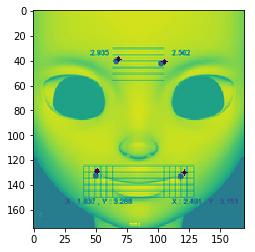

len(result[1][r]) 8


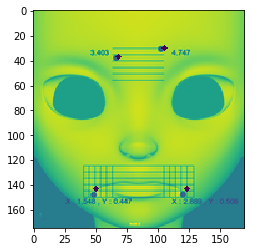

epoch is :  3300 ,  cost is :  3.86344e-07
len(result[1][r]) 8


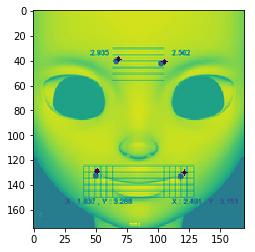

len(result[1][r]) 8


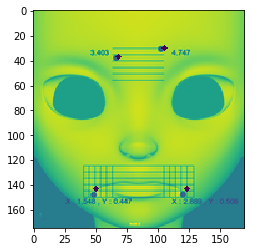

epoch is :  3600 ,  cost is :  2.22211e-07
len(result[1][r]) 8


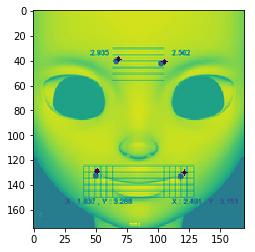

len(result[1][r]) 8


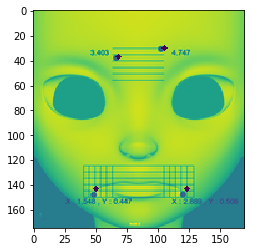

epoch is :  3900 ,  cost is :  1.22119e-07
len(result[1][r]) 8


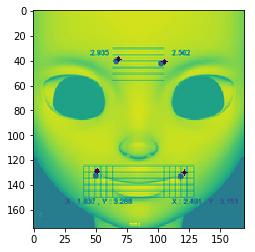

len(result[1][r]) 8


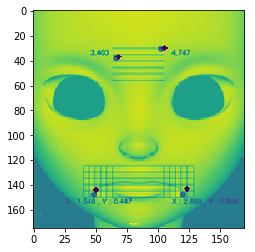

epoch is :  4200 ,  cost is :  2.44691e-05
len(result[1][r]) 8


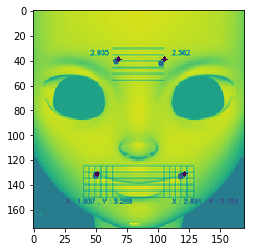

len(result[1][r]) 8


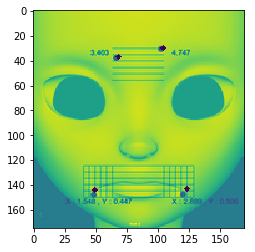

epoch is :  4500 ,  cost is :  1.18583e-06
len(result[1][r]) 8


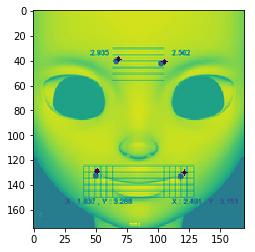

len(result[1][r]) 8


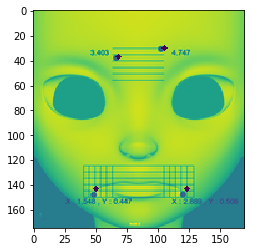

epoch is :  4800 ,  cost is :  9.64776e-06
len(result[1][r]) 8


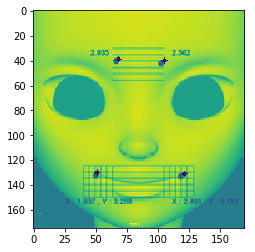

len(result[1][r]) 8


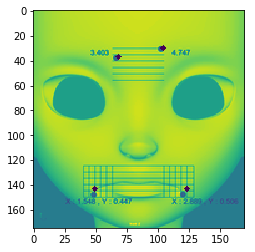

epoch is :  5100 ,  cost is :  1.35071e-05
len(result[1][r]) 8


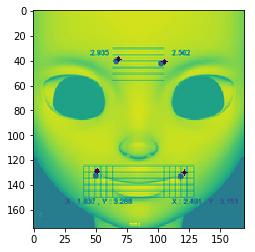

len(result[1][r]) 8


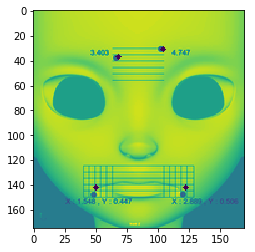

epoch is :  5400 ,  cost is :  3.81728e-05
len(result[1][r]) 8


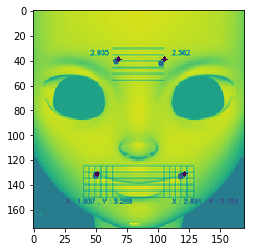

len(result[1][r]) 8


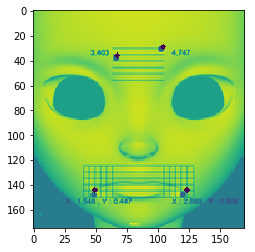

epoch is :  5700 ,  cost is :  1.10461e-06
len(result[1][r]) 8


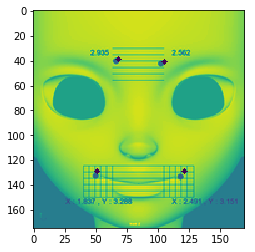

len(result[1][r]) 8


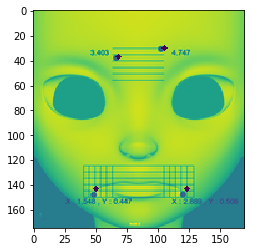

epoch is :  6000 ,  cost is :  1.06737e-06
len(result[1][r]) 8


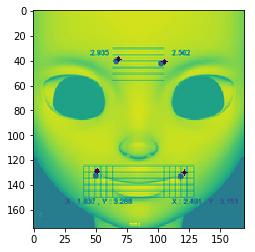

len(result[1][r]) 8


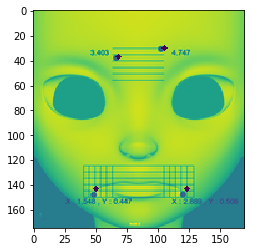

epoch is :  6300 ,  cost is :  8.88716e-07
len(result[1][r]) 8


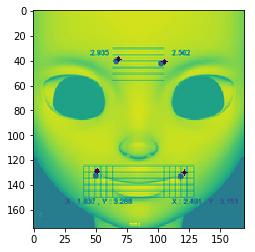

len(result[1][r]) 8


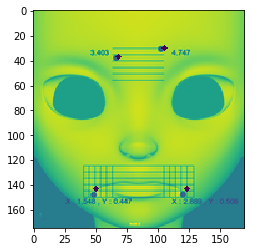

epoch is :  6600 ,  cost is :  4.69677e-08
len(result[1][r]) 8


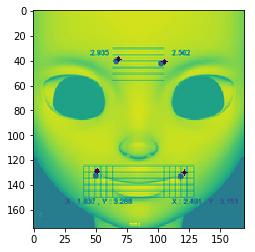

len(result[1][r]) 8


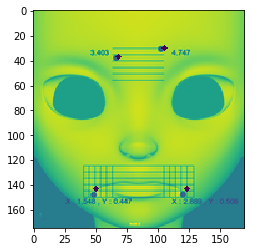

epoch is :  6900 ,  cost is :  2.40725e-05
len(result[1][r]) 8


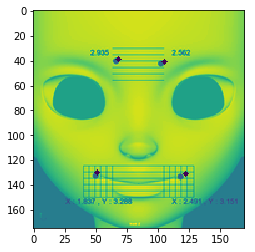

len(result[1][r]) 8


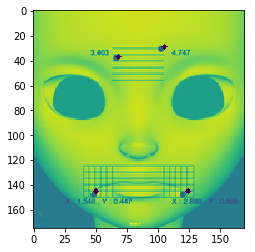

epoch is :  7200 ,  cost is :  6.17335e-07
len(result[1][r]) 8


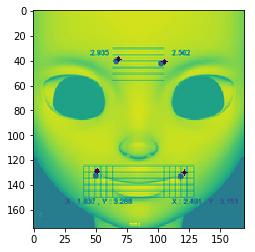

len(result[1][r]) 8


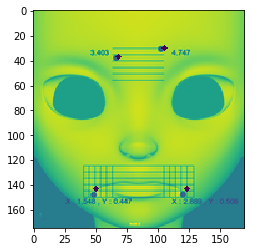

epoch is :  7500 ,  cost is :  1.35667e-05
len(result[1][r]) 8


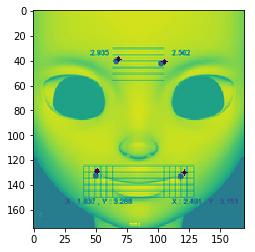

len(result[1][r]) 8


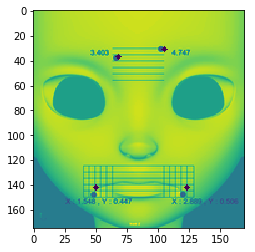

epoch is :  7800 ,  cost is :  1.31187e-06
len(result[1][r]) 8


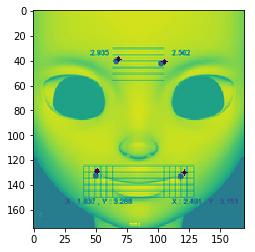

len(result[1][r]) 8


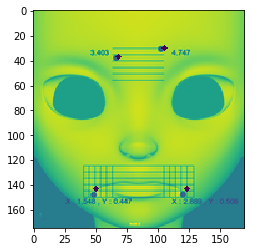

epoch is :  8100 ,  cost is :  1.55309e-07
len(result[1][r]) 8


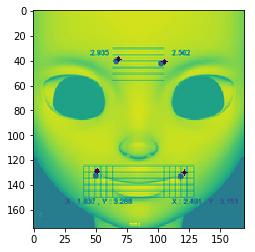

len(result[1][r]) 8


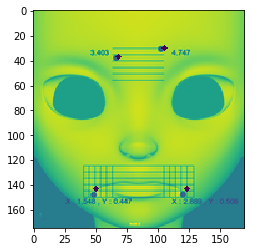

epoch is :  8400 ,  cost is :  2.39861e-06
len(result[1][r]) 8


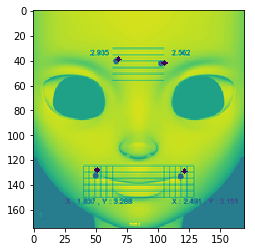

len(result[1][r]) 8


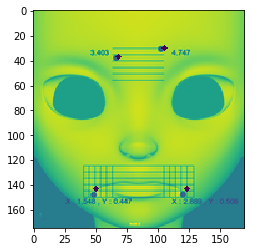

epoch is :  8700 ,  cost is :  2.66538e-08
len(result[1][r]) 8


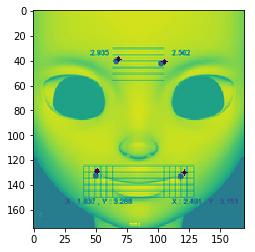

len(result[1][r]) 8


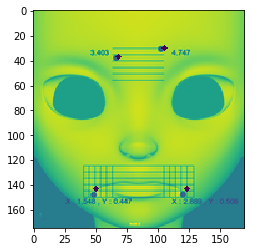

epoch is :  9000 ,  cost is :  5.33169e-06
len(result[1][r]) 8


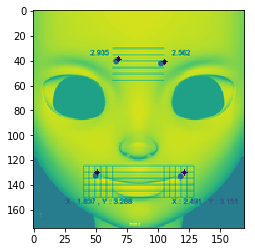

len(result[1][r]) 8


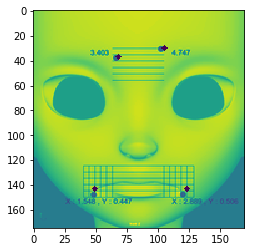

epoch is :  9300 ,  cost is :  4.89113e-08
len(result[1][r]) 8


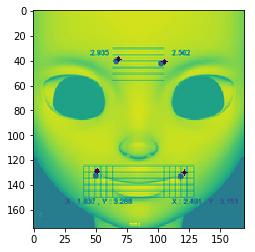

len(result[1][r]) 8


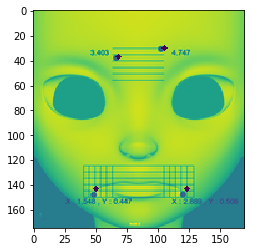

epoch is :  9600 ,  cost is :  1.28205e-05
len(result[1][r]) 8


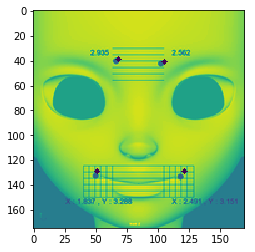

len(result[1][r]) 8


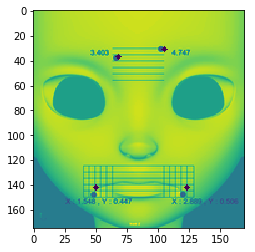

epoch is :  9900 ,  cost is :  1.21125e-07
len(result[1][r]) 8


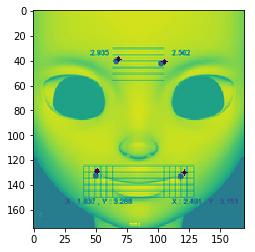

len(result[1][r]) 8


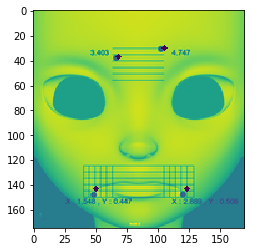

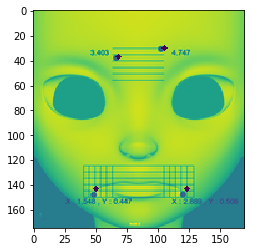

In [29]:
#이번엔 만번 학습 하고, 300번 마다 결과를 보여줍니다.
for i in range(10000):
    result = sess.run( (train_step , y2 , cost)  , feed_dict={x: faceImages, y_: faceLabels})
    if i%300== 0:
        print("epoch is : " , i , ",  cost is : " , result[2])
        for r in range(len(result[1])):
            AnserImage = faceAnswers[r].copy().reshape((175,170))
            print("len(result[1][r])" , len(result[1][r]))
            for xy in range(len(result[1][r])):
                
                if xy%2 == 0:
                    yy = int(result[1][r][xy]*175.0) # Y 리스케일링
                else:
                    xx = int(result[1][r][xy]*170.0) # X 리스케일링
                    cv2.circle(AnserImage,(yy , xx), 2, (0,255,0), -1)#테스트 이미지에 좌표를 그려준다
            plt.imshow(AnserImage)#테스트 이미지 출력
            display.display(plt.gcf())#이미지를 실시간으로 표현한다